# Descriptive Statistics and Tests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# NON Stationary
df1 = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq= 'MS'

In [3]:
# Stationary 
df2 = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq= 'D'

In [4]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


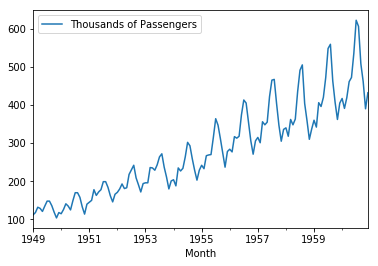

In [7]:
df1.plot();

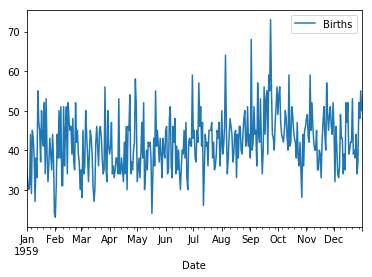

In [9]:
df2.plot();

### Augmented Dickey Fuller Test to know Stationary Time Series

#### DF1 Airline Passengers: It's supposed to be a Stationary Time Series

In [10]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df1['Thousands of Passengers'], autolag='AIC')
print('Test statistic: {}'.format(dftest[0]))
print('p-value: {}'.format(dftest[1]))
print('Lag: {}'.format(dftest[2]))
print('Number of observations: {}'.format(dftest[3]))
for key, value in dftest[4].items():    
    print('Critical Value ({}) = {}'.format(key, value))

Test statistic: 0.815368879206047
p-value: 0.991880243437641
Lag: 13
Number of observations: 130
Critical Value (1%) = -3.4816817173418295
Critical Value (5%) = -2.8840418343195267
Critical Value (10%) = -2.578770059171598


In [11]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df1['Thousands of Passengers'],'Dickey-Fuller Thousand of Passengers')

Augmented Dickey-Fuller Test: Dickey-Fuller Thousand of Passengers
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


#### DF2 Births: It's supposed to be a Non Stationary Time Series

In [13]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df2['Births'], autolag='AIC')
print('Test statistic: {}'.format(dftest[0]))
print('p-value: {}'.format(dftest[1]))
print('Lag: {}'.format(dftest[2]))
print('Number of observations: {}'.format(dftest[3]))
for key, value in dftest[4].items():    
    print('Critical Value ({}) = {}'.format(key, value))

Test statistic: -4.808291253559765
p-value: 5.2434129901498554e-05
Lag: 6
Number of observations: 358
Critical Value (1%) = -3.448748905151901
Critical Value (5%) = -2.8696473721448728
Critical Value (10%) = -2.5710891239349585


In [14]:
adf_test(df2['Births'],'Dickey-Fuller Births')

Augmented Dickey-Fuller Test: Dickey-Fuller Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Granger causality Test

The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

In [15]:
df3 = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/samples.csv',index_col=0,parse_dates=True)
df3.index.freq= 'MS'
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


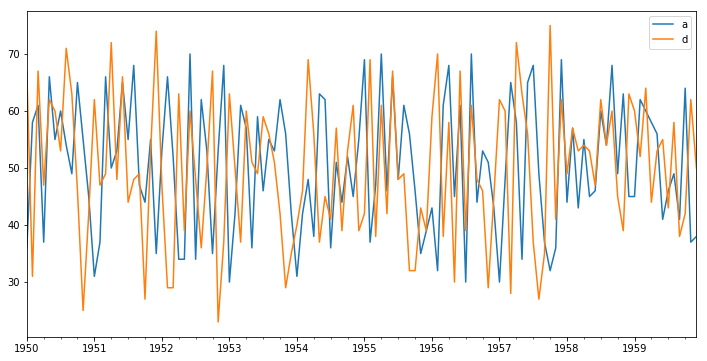

In [16]:
df3[['a','d']].plot(figsize=(12,6));

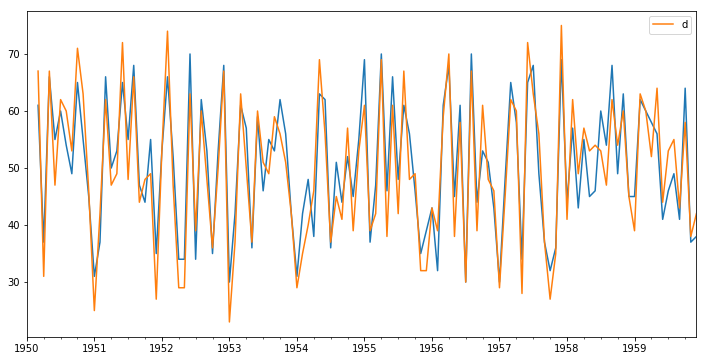

In [18]:
df3['a'].iloc[2:].plot(figsize=(12,6))
df3['d'].shift(2).plot(legend=True);

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests
# Add a semicolon at the end to avoid duplicate output
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


___Essentially we're looking for extremely low p-values, which we see at lag 2.<br>
By comparison, let's compare two datasets that are not at all similar, 'b' and 'd'.___

In [20]:
# Add a semicolon at the end to avoid duplicate output
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
